In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import statsmodels.api as sm
import pylab as py

import pandas as pd

data = pd.read_excel("Central parking dataset.xls", sheet_name=1)
data.head()

,Vehicle,Equipment,DateIn,Unnamed: 3,DateOut,Unnamed: 5,Amount,TimeDiff,Ticket_Type,Weekday,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,6,2009-07-04,10:39:00,2009-07-04,14:13:00,70,214,Ticket,Saturday,NaN,Legend,NaN
1,1,5,2009-07-04,11:00:00,2009-07-04,12:47:00,50,107,Ticket,Saturday,NaN,Amount,Description
2,1,6,2009-07-04,12:08:00,2009-07-04,13:58:00,0,110,Pass,Saturday,NaN,0,Pass holders
3,1,6,2009-07-04,12:56:00,2009-07-04,16:58:00,90,242,Ticket,Saturday,NaN,300,Charged for loss of ticket
4,1,5,2009-07-04,13:57:00,2009-07-04,16:04:00,50,127,Ticket,Saturday,NaN,NaN,NaN


In [25]:
data.columns

Index(['Vehicle', 'Equipment', 'DateIn', 'Unnamed: 3', 'DateOut', 'Unnamed: 5',
       'Amount', 'TimeDiff', 'Ticket_Type', 'Weekday', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [26]:
data.drop(columns=['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], inplace=True)
data.rename(columns = {'Unnamed: 3':'Time In','Unnamed: 5':'Time Out'}, inplace = True)
data.head()

,Vehicle,Equipment,DateIn,Time In,DateOut,Time Out,Amount,TimeDiff,Ticket_Type,Weekday
0,1,6,2009-07-04,10:39:00,2009-07-04,14:13:00,70,214,Ticket,Saturday
1,1,5,2009-07-04,11:00:00,2009-07-04,12:47:00,50,107,Ticket,Saturday
2,1,6,2009-07-04,12:08:00,2009-07-04,13:58:00,0,110,Pass,Saturday
3,1,6,2009-07-04,12:56:00,2009-07-04,16:58:00,90,242,Ticket,Saturday
4,1,5,2009-07-04,13:57:00,2009-07-04,16:04:00,50,127,Ticket,Saturday


In [27]:
data.describe()

,Vehicle,Equipment,Amount,TimeDiff
count,4995.0,4995.000000,4995.000000,4995.000000
mean,1.0,5.945145,62.506507,153.762362
std,0.0,1.126106,31.422103,87.728564
min,1.0,5.000000,0.000000,1.000000
25%,1.0,5.000000,50.000000,91.000000
50%,1.0,6.000000,50.000000,141.000000
75%,1.0,6.000000,70.000000,200.000000
max,1.0,9.000000,300.000000,713.000000


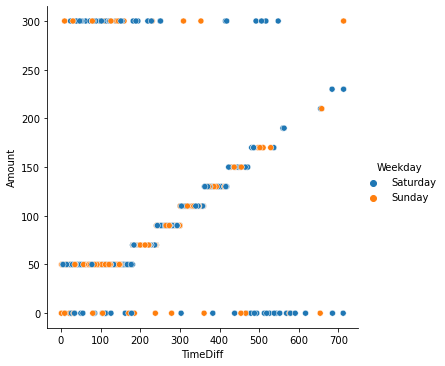

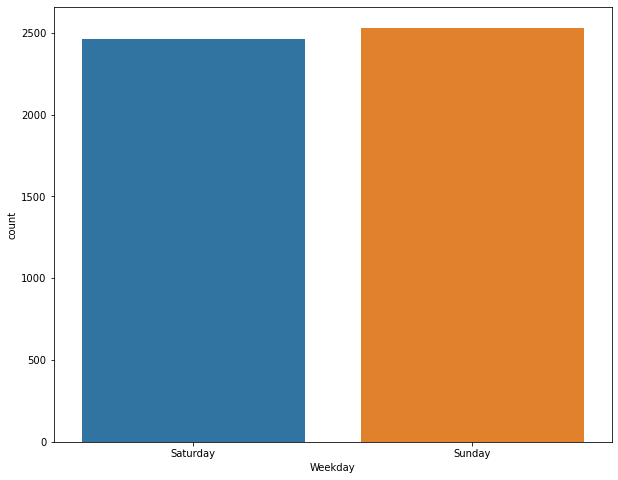

In [28]:
sns.relplot(data=data, x="TimeDiff", y="Amount", hue="Weekday")

plt.figure(figsize=(10,8))
sns.countplot(x='Weekday', data=data)
plt.show()

In [29]:
## droping feilds of ticket lost as they are behaving like outlier, other solution is that we can replace the \
## amount value by the actual value for the time they have parked their cars

#droping
data=data[data["Amount"]<300]
data=data[data["Amount"]>0]
data["Amount"].value_counts()

50     3307
70      962
90      379
110     161
130      46
150      23
170       9
190       3
230       2
210       2
Name: Amount, dtype: int64

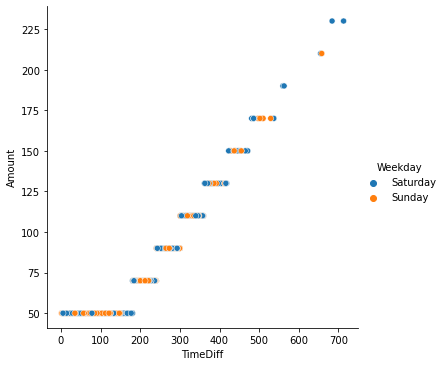

In [30]:
sns.relplot(data=data, x="TimeDiff", y="Amount", hue="Weekday")

In [31]:
data[(data["Amount"]>60) & (data["TimeDiff"]<=180)] #cheching vallet parking

,Vehicle,Equipment,DateIn,Time In,DateOut,Time Out,Amount,TimeDiff,Ticket_Type,Weekday


No vallet parking only 4 wheeler data.

In [32]:
# create a list of our conditions
conditions = [
    ((data["Time In"]>=dt.time(hour=0)) & (data["Time In"]<dt.time(hour=12))),
    ((data["Time In"]>=dt.time(hour=12)) & (data["Time In"]<dt.time(hour=18))),
    ((data["Time In"]>=dt.time(hour=18)) & (data["Time In"]<dt.time(hour=23, minute=59)))
    ]

# create a list of the values we want to assign for each condition
values = ['Morning', 'Afternoon', 'Evening']

# create a new column and use np.select to assign values to it using our lists as arguments
data['Timing'] = np.select(conditions, values)

# display updated DataFrame
data.head()

,Vehicle,Equipment,DateIn,Time In,DateOut,Time Out,Amount,TimeDiff,Ticket_Type,Weekday,Timing
0,1,6,2009-07-04,10:39:00,2009-07-04,14:13:00,70,214,Ticket,Saturday,Morning
1,1,5,2009-07-04,11:00:00,2009-07-04,12:47:00,50,107,Ticket,Saturday,Morning
3,1,6,2009-07-04,12:56:00,2009-07-04,16:58:00,90,242,Ticket,Saturday,Afternoon
4,1,5,2009-07-04,13:57:00,2009-07-04,16:04:00,50,127,Ticket,Saturday,Afternoon
5,1,8,2009-07-04,14:43:00,2009-07-04,17:15:00,50,152,Ticket,Saturday,Afternoon


In [33]:
tim=data["Timing"].value_counts()
tim

Afternoon    2737
Evening      1800
Morning       357
Name: Timing, dtype: int64

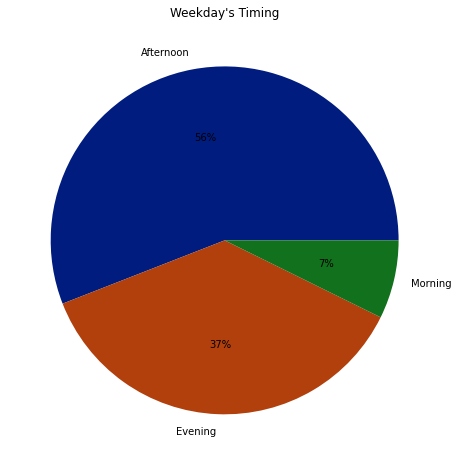

In [34]:
tim=data["Timing"].value_counts()
tim

plt.figure(figsize=(10,8))
# declaring data
piedata = [tim[0],tim[1],tim[2]]
keys = ["Afternoon", "Evening", "Morning"]
  
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')
  
# plotting data on chart
plt.pie(piedata, labels=keys, colors=palette_color, autopct='%.0f%%')

plt.title("Weekday's Timing")
# displaying chart
plt.show()

## Distribution?

In [35]:
# population parameters

data_mean=np.mean(data["TimeDiff"])
print("Mean of Time Diff = ",data_mean)
data_median=np.median(data["TimeDiff"])
print("Median of Time Diff = ",data_median)
data_mode=data["TimeDiff"].mode()
print("Mode of Time Diff = ",data_mode)

Mean of Time Diff =  151.96955455659992
Median of Time Diff =  141.0
Mode of Time Diff =  0    127
1    137
2    188
dtype: int64


q4. people are spending more time on weekends as compared to weekdays as mean and median is higher in weekends.

In [52]:
sample_data=data.sample(frac = 1)
len(sample_data)

4894

In [56]:
# sample parameters
sample_data=data.sample(frac = 1)
len(sample_data)

data_mean=np.mean(sample_data["TimeDiff"])
print("Mean of Time Diff = ",data_mean)
data_median=np.median(sample_data["TimeDiff"])
print("Median of Time Diff = ",data_median)
data_mode=sample_data["TimeDiff"].mode()
print("Mode of Time Diff = ",data_mode)


Mean of Time Diff =  151.96955455659992
Median of Time Diff =  141.0
Mode of Time Diff =  0    127
1    137
2    188
dtype: int64


In [57]:
sample_data.skew(axis = 0, skipna = True)

Vehicle      0.000000
Equipment    0.975303
Amount       2.574351
TimeDiff     1.056902
dtype: float64

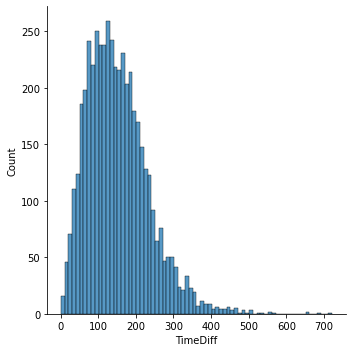

In [58]:
sns.displot(sample_data, x="TimeDiff", binwidth=10)

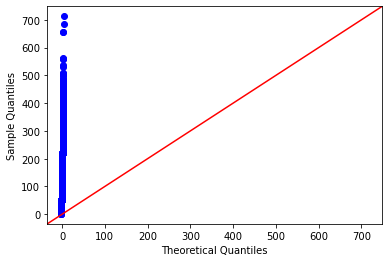

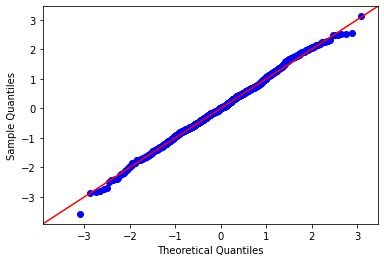

In [59]:
# qq plot
from scipy.stats import norm

sm.qqplot(sample_data["TimeDiff"], line ='45')
my_data = norm.rvs(size=1000)
sm.qqplot(my_data, line='45')
py.show()

In [60]:
# Q5

# create a list of our conditions
conditions = [
    ((data["Time In"]>=dt.time(hour=10)) & (data["Time In"]<dt.time(hour=14))),
    ((data["Time In"]>=dt.time(hour=14)) & (data["Time In"]<dt.time(hour=18))),
    ((data["Time In"]>=dt.time(hour=18)) & (data["Time In"]<dt.time(hour=23, minute=59)))
    ]

# create a list of the values we want to assign for each condition
values = ['Morning', 'Afternoon', 'Evening']

# create a new column and use np.select to assign values to it using our lists as arguments
data['Timing'] = np.select(conditions, values)

# display updated DataFrame
data.head()

,Vehicle,Equipment,DateIn,Time In,DateOut,Time Out,Amount,TimeDiff,Ticket_Type,Weekday,Timing
0,1,6,2009-07-04,10:39:00,2009-07-04,14:13:00,70,214,Ticket,Saturday,Morning
1,1,5,2009-07-04,11:00:00,2009-07-04,12:47:00,50,107,Ticket,Saturday,Morning
3,1,6,2009-07-04,12:56:00,2009-07-04,16:58:00,90,242,Ticket,Saturday,Morning
4,1,5,2009-07-04,13:57:00,2009-07-04,16:04:00,50,127,Ticket,Saturday,Morning
5,1,8,2009-07-04,14:43:00,2009-07-04,17:15:00,50,152,Ticket,Saturday,Afternoon


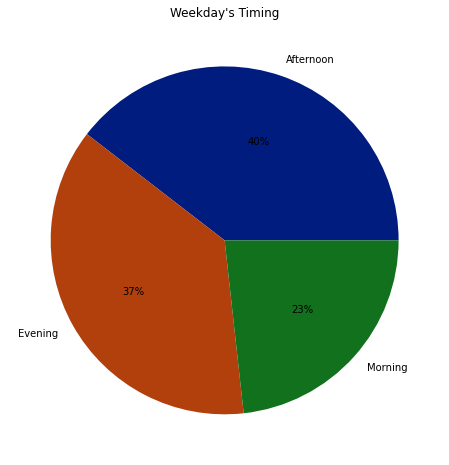

In [61]:
tim=data["Timing"].value_counts()
tim

plt.figure(figsize=(10,8))
# declaring data
piedata = [tim[0],tim[1],tim[2]]
keys = ["Afternoon", "Evening", "Morning"]
  
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')
  
# plotting data on chart
plt.pie(piedata, labels=keys, colors=palette_color, autopct='%.0f%%')

plt.title("Weekday's Timing")
# displaying chart
plt.show()

In [64]:
data["Timing"]=="Morning"

0        True
1        True
3        True
4        True
5       False
        ...  
4990    False
4991     True
4992    False
4993    False
4994    False
Name: Timing, Length: 4894, dtype: bool